In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the dataset
df = pd.read_csv('walmart_data.csv')

In [ ]:
# Display the first few rows
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  


In [ ]:
# Display the first few rows
print(df.tail())

        User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  


In [ ]:
# Inspect the dataset to see how many columns and row are there and what types of data we have
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


In [ ]:
# count how many unique values in each column
def unique_values(df):
  for column in df.columns:
    unique_values = df[column].nunique()
    print(f"\nUnique Values of {column}: ", unique_values)

unique_values(df)


Unique Values of User_ID:  5891

Unique Values of Product_ID:  3631

Unique Values of Gender:  2

Unique Values of Age:  7

Unique Values of Occupation:  21

Unique Values of City_Category:  3

Unique Values of Stay_In_Current_City_Years:  5

Unique Values of Marital_Status:  2

Unique Values of Product_Category:  20

Unique Values of Purchase:  18105


In [ ]:
# Check for missing values
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [ ]:
#Data Cleaning

In [ ]:
#Removing the '+' symbol and converting it to a numeric format for 'Stay_In_Current_City_Years' column
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# Removing "+" symbol
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.str.replace("+","")

In [ ]:
#checking after removing
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
#converting it to a numeric format
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [ ]:
# Checking duplicate values in the dataset
df.duplicated(subset=None,keep='first').sum()

0

In [ ]:
#Statistical Summary
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


In [ ]:
#Exploratory Data Analysis (EDA)


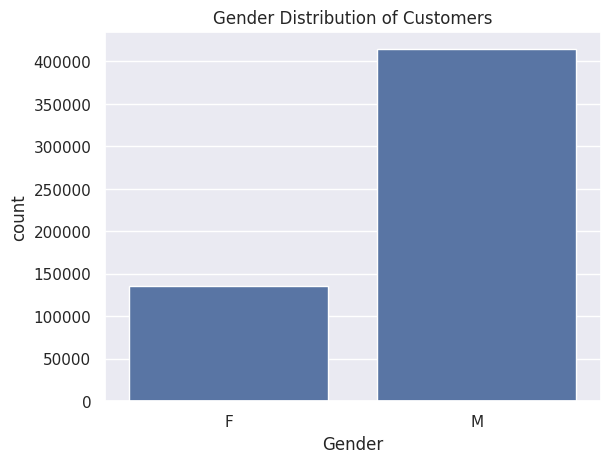

In [ ]:
#Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.show()

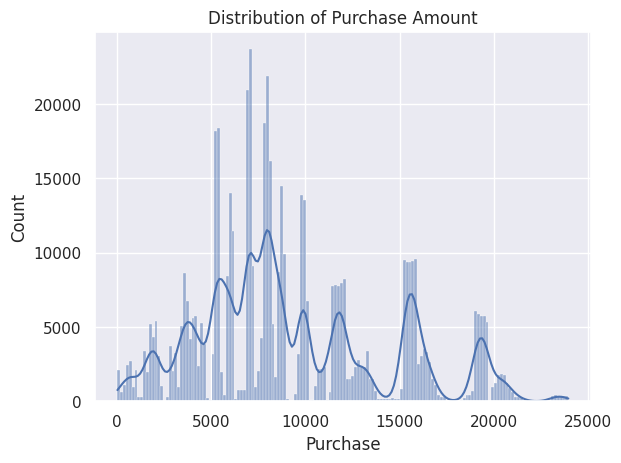

In [ ]:
# Distribution of Purchase amount
sns.histplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

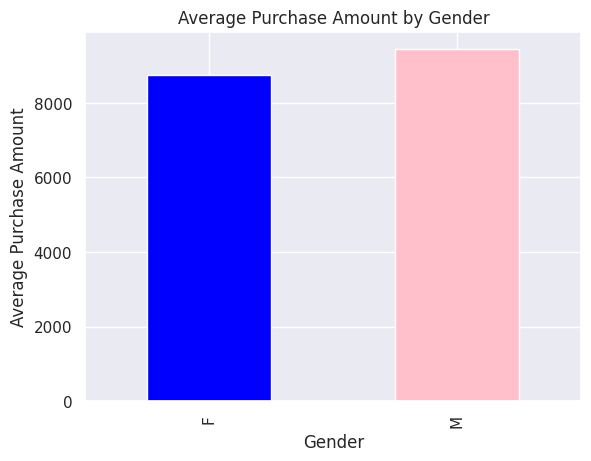

In [ ]:
# Average purchase by Gender
avg_purchase_by_gender = df.groupby('Gender')['Purchase'].mean()

# Bar plot
avg_purchase_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

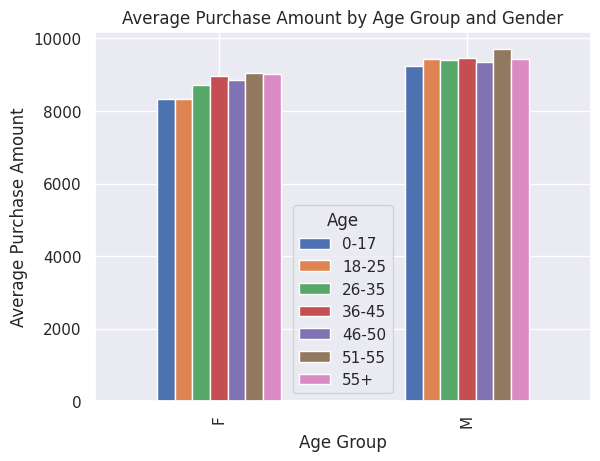

In [ ]:
# Group by Gender and Age and calculate the average purchase amount
avg_purchase_by_age_gender = df.groupby(['Gender', 'Age'])['Purchase'].mean().unstack()

# Plotting
avg_purchase_by_age_gender.plot(kind='bar', stacked=False)
plt.title('Average Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

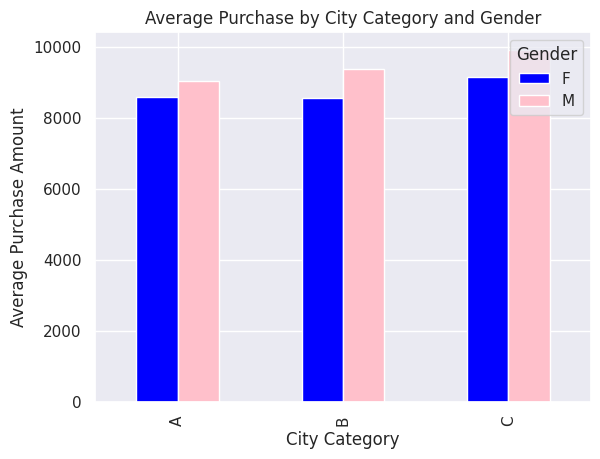

In [ ]:
# Average purchase by City Category and Gender
avg_purchase_by_city_gender = df.groupby(['City_Category', 'Gender'])['Purchase'].mean().unstack()

# Bar plot
avg_purchase_by_city_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Purchase by City Category and Gender')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

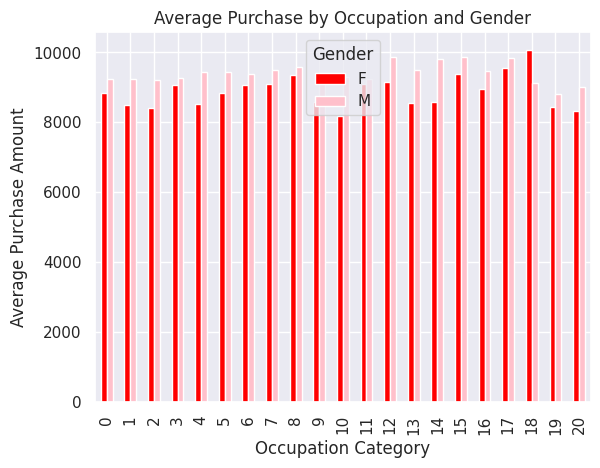

In [ ]:
# Average purchase by Occupation and Gender
avg_purchase_by_city_gender = df.groupby(['Occupation', 'Gender'])['Purchase'].mean().unstack()

# Bar plot
avg_purchase_by_city_gender.plot(kind='bar', color=['red', 'pink'])
plt.title('Average Purchase by Occupation and Gender')
plt.xlabel('Occupation Category')
plt.ylabel('Average Purchase Amount')
plt.show()

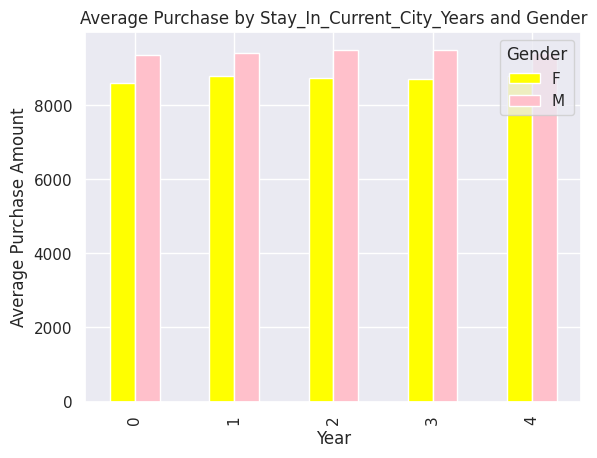

In [ ]:
# Average purchase by Stay_In_Current_City_Years and Gender
avg_purchase_by_city_gender = df.groupby(['Stay_In_Current_City_Years', 'Gender'])['Purchase'].mean().unstack()

# Bar plot
avg_purchase_by_city_gender.plot(kind='bar', color=['yellow', 'pink'])
plt.title('Average Purchase by Stay_In_Current_City_Years and Gender')
plt.xlabel('Year')
plt.ylabel('Average Purchase Amount')
plt.show()

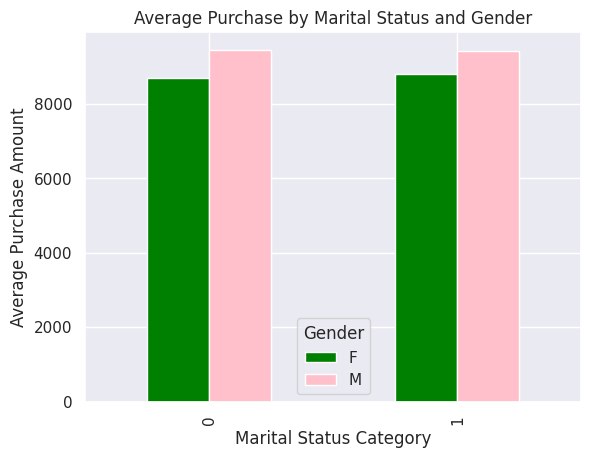

In [ ]:
# Average purchase by Marital Status and Gender
avg_purchase_by_city_gender = df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean().unstack()

# Bar plot
avg_purchase_by_city_gender.plot(kind='bar', color=['green', 'pink'])
plt.title('Average Purchase by Marital Status and Gender')
plt.xlabel('Marital Status Category')
plt.ylabel('Average Purchase Amount')
plt.show()

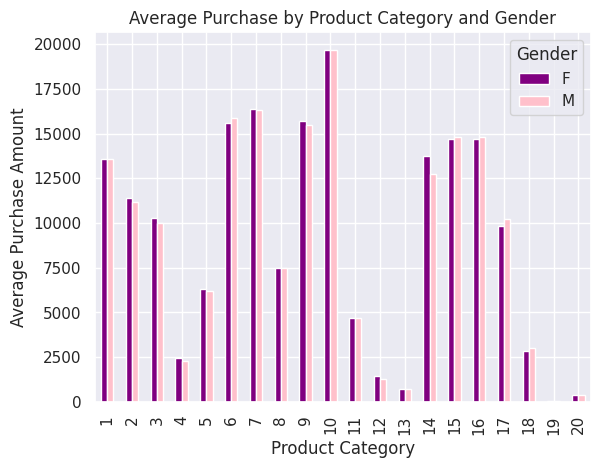

In [ ]:
# Average purchase by Product Category and Gender
avg_purchase_by_city_gender = df.groupby(['Product_Category', 'Gender'])['Purchase'].mean().unstack()

# Bar plot
avg_purchase_by_city_gender.plot(kind='bar', color=['purple', 'pink'])
plt.title('Average Purchase by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.show()

In [ ]:
#Hypothesis Testing

In [ ]:
#T-Test for Gender Difference in Spending
from scipy.stats import ttest_ind

# Separate purchase amounts by gender
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

# Perform T-test
t_stat, p_value = ttest_ind(male_purchase, female_purchase)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 44.837957934353966
P-value: 0.0


In [ ]:
#Confidence Interval Analysis
import scipy.stats as stats
import numpy as np

# Calculate the mean and standard error of the mean (SEM) for the Purchase column
mean_purchase = df['Purchase'].mean()
sem_purchase = stats.sem(df['Purchase'])

# Calculate the 95% confidence interval
confidence_level = 0.95
ci_lower, ci_upper = stats.t.interval(confidence_level, len(df['Purchase'])-1, loc=mean_purchase, scale=sem_purchase)

mean_purchase, ci_lower, ci_upper

(9263.968712959126, 9250.694472258305, 9277.242953659947)

In [ ]:
# Define a function to calculate confidence intervals for a given group
def calculate_group_ci(data, group_column, target_column='Purchase', confidence_level=0.95):
    grouped_data = data.groupby(group_column)[target_column].agg(['mean', 'count', 'std'])
    sem = grouped_data['std'] / np.sqrt(grouped_data['count'])
    ci_bounds = stats.t.ppf((1 + confidence_level) / 2., grouped_data['count'] - 1) * sem
    grouped_data['ci_lower'] = grouped_data['mean'] - ci_bounds
    grouped_data['ci_upper'] = grouped_data['mean'] + ci_bounds
    return grouped_data[['mean', 'ci_lower', 'ci_upper']]

# Calculate confidence intervals for Gender, Age, and City_Category
ci_gender = calculate_group_ci(df, 'Gender')
ci_age = calculate_group_ci(df, 'Age')
ci_city_category = calculate_group_ci(df, 'City_Category')

# Display the results
print("Confidence Intervals by Gender:\n", ci_gender)
print("\nConfidence Intervals by Age:\n", ci_age)
print("\nConfidence Intervals by City_Category:\n", ci_city_category)

Confidence Intervals by Gender:
                mean     ci_lower     ci_upper
Gender                                       
F       8734.565765  8709.211321  8759.920209
M       9437.526040  9422.019402  9453.032679

Confidence Intervals by Age:
               mean     ci_lower     ci_upper
Age                                         
0-17   8933.464640  8851.941436  9014.987845
18-25  9169.663606  9138.407569  9200.919643
26-35  9252.690633  9231.733561  9273.647705
36-45  9331.350695  9301.669084  9361.032305
46-50  9208.625697  9163.083936  9254.167458
51-55  9534.808031  9483.989875  9585.626187
55+    9336.280459  9269.295064  9403.265855

Confidence Intervals by City_Category:
                       mean     ci_lower     ci_upper
City_Category                                       
A              8911.939216  8886.991621  8936.886811
B              9151.300563  9131.099743  9171.501382
C              9719.920993  9695.336934  9744.505052
